In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import re
import shutil
import cv2
import imghdr
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import preprocessing
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [2]:
data_dir = 'data\dataset_padang_food'

In [3]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (1).png
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (10).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (100).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (101).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (102).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (103).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (104).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (105).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (106).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (107).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (11).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (12).jpg
Issue with image data\dataset_padang_food\ayam_goreng\ayam_goreng (13).jpg
Issue with image d

In [4]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 993 files belonging to 9 classes.


In [5]:
data_iterator = data.as_numpy_iterator()

In [6]:
data = tf.keras.utils.image_dataset_from_directory(data_dir, image_size=(128, 128), batch_size=32)

Found 993 files belonging to 9 classes.


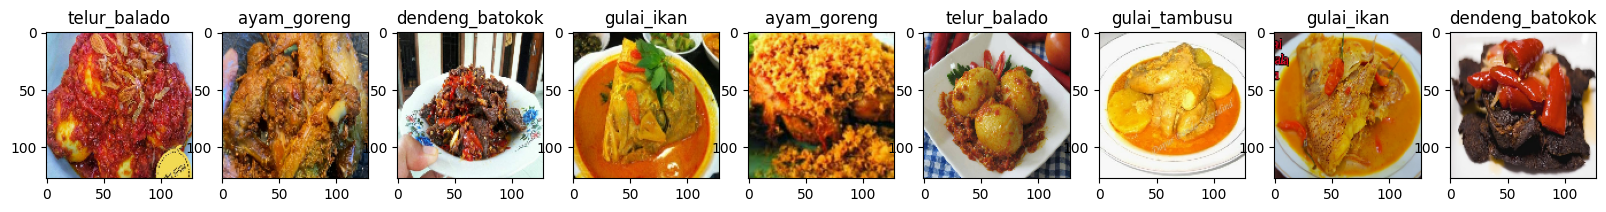

In [7]:
class_names = data.class_names

batch = next(iter(data))
images, labels = batch

fig, ax = plt.subplots(ncols=9, figsize=(20, 20))

for idx in range(9):
    ax[idx].imshow(images[idx].numpy().astype(int))
    ax[idx].title.set_text(class_names[labels[idx]])

In [8]:
data.as_numpy_iterator().next()

(array([[[[2.12000000e+02, 2.14000000e+02, 2.13000000e+02],
          [2.14000000e+02, 2.14000000e+02, 2.16000000e+02],
          [2.11000000e+02, 2.09000000e+02, 2.14000000e+02],
          ...,
          [1.96000000e+02, 1.92000000e+02, 1.83000000e+02],
          [2.01000000e+02, 1.92000000e+02, 1.85000000e+02],
          [2.02000000e+02, 1.93000000e+02, 1.86000000e+02]],
 
         [[2.10000000e+02, 2.11000000e+02, 2.16000000e+02],
          [2.14000000e+02, 2.13000000e+02, 2.19000000e+02],
          [2.06000000e+02, 2.03000000e+02, 2.10000000e+02],
          ...,
          [1.91000000e+02, 1.83000000e+02, 1.72000000e+02],
          [1.94000000e+02, 1.84000000e+02, 1.74000000e+02],
          [1.97000000e+02, 1.84000000e+02, 1.75000000e+02]],
 
         [[1.99000000e+02, 1.99000000e+02, 2.11000000e+02],
          [2.04000000e+02, 2.02000000e+02, 2.13000000e+02],
          [1.94000000e+02, 1.91000000e+02, 2.00000000e+02],
          ...,
          [1.80000000e+02, 1.67000000e+02, 1.5100

In [9]:
train_size = int(len(data)*.8)
val_size = int(len(data)*.1)
test_size = int(len(data)*.1)

In [10]:
train_size

25

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [12]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
model = Sequential()

In [14]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(16, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(9, activation='softmax')
])

e:\App\Bahasa\Python\anaconda3\envs\TensorFlow\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         2,313 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 815,097 (3.11 MB)

 Trainable params: 815,097 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
logdir='logs'

In [18]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [19]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1481 - loss: 50.8254 - val_accuracy: 0.2396 - val_loss: 2.0681
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.2350 - loss: 2.0733 - val_accuracy: 0.4479 - val_loss: 1.6174
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4071 - loss: 1.7422 - val_accuracy: 0.6458 - val_loss: 1.1905
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5811 - loss: 1.2612 - val_accuracy: 0.7292 - val_loss: 0.8061
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7753 - loss: 0.7172 - val_accuracy: 0.7812 - val_loss: 0.8638
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.8764 - loss: 0.4604 - val_accuracy: 0.8542 - val_loss: 0.5332
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.9211 - loss: 0.2840 - val_accuracy: 0.8854 - val_loss: 0.3763
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.9638 - loss: 0.1901 - val_accuracy: 0.8958 - 

KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat = tf.argmax(yhat, axis=1)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

In [ ]:
img = cv2.imread('temp.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
# Expand dimensions to match the model input shape
img_array = tf.expand_dims(resize, axis=0)

# Make a prediction using the model
predictions = model.predict(img_array)

# Get the predicted class
predicted_class = np.argmax(predictions[0])

print('Predicted class:', predicted_class)

In [ ]:
# data_original_dir = 'data\dataset_padang_food_original'
# data_dir = 'data\dataset_padang_food'

# if os.path.exists(data_dir):
# 	dataDirList = os.listdir(data_dir)
# 	print(dataDirList)
# else:
# 	print(f"Directory '{data_dir}' does not exist.")

# splitSize = 0.85

In [ ]:
img = cv2.imread('temp.jpg')
plt.imshow(img)
plt.show()